1.

In [33]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('./weatherHistory.csv')
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [34]:
Y = df["Apparent Temperature (C)"] - df["Temperature (C)"]
df1 = df[["Humidity","Wind Speed (km/h)"]]
X = df1

In [35]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.02918594 -0.11929075]
Sabit değer (bias): 
 2.4381054151876937


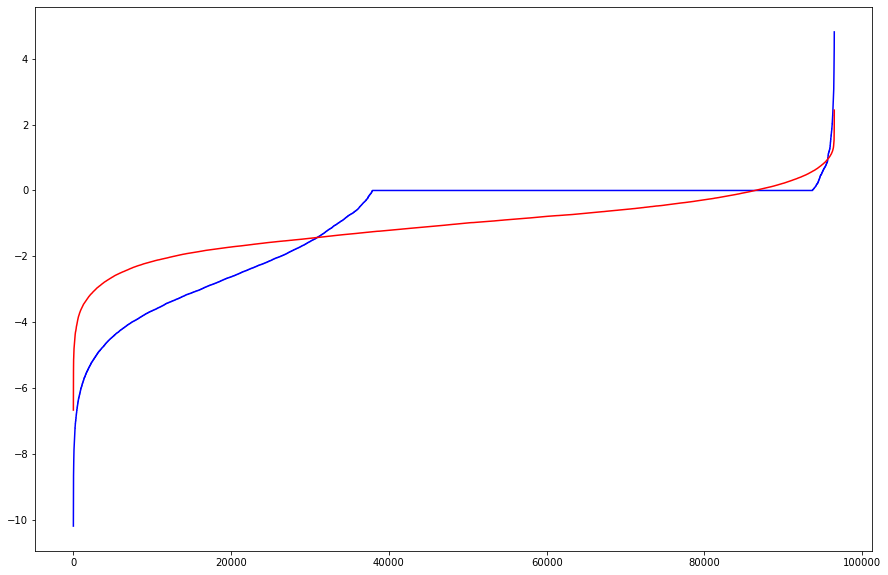

In [37]:
plt.figure(figsize=(15,10))
plt.plot(range(df.shape[0]),np.sort(Y),color="blue")
plt.plot(range(df.shape[0]),np.sort(lrm.predict(X)),color="red")
plt.show()

In [38]:
X = sm.add_constant(X)

In [8]:
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:23:51   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4381      0.021    115.948      0.000       2.397       2.479
Humidity             -3.0292      0.024   -126.479      0.000      -3.076      -2.982
Wind Speed (km/h)    -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-kare degerleri 0.288'dir. Dusuk bir R-kare degeri oldugu icin datasetimizi yeterince aciklamadigini soyleyebiliriz.

In [9]:
Y = df["Apparent Temperature (C)"] - df["Temperature (C)"]
df2 = df[["Humidity","Wind Speed (km/h)"]]

In [10]:
df2["Humidity * Wind Speed (km/h)"]=df["Humidity"]*df["Wind Speed (km/h)"]

In [11]:
df2.head()

,Humidity,Wind Speed (km/h),Humidity * Wind Speed (km/h)
0,0.89,14.1197,12.566533
1,0.86,14.2646,12.267556
2,0.89,3.9284,3.496276
3,0.83,14.1036,11.705988
4,0.83,11.0446,9.167018


In [12]:
X=df2

In [13]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 0.17751219  0.09048213 -0.29711946]
Sabit değer (bias): 
 0.08393631009782743


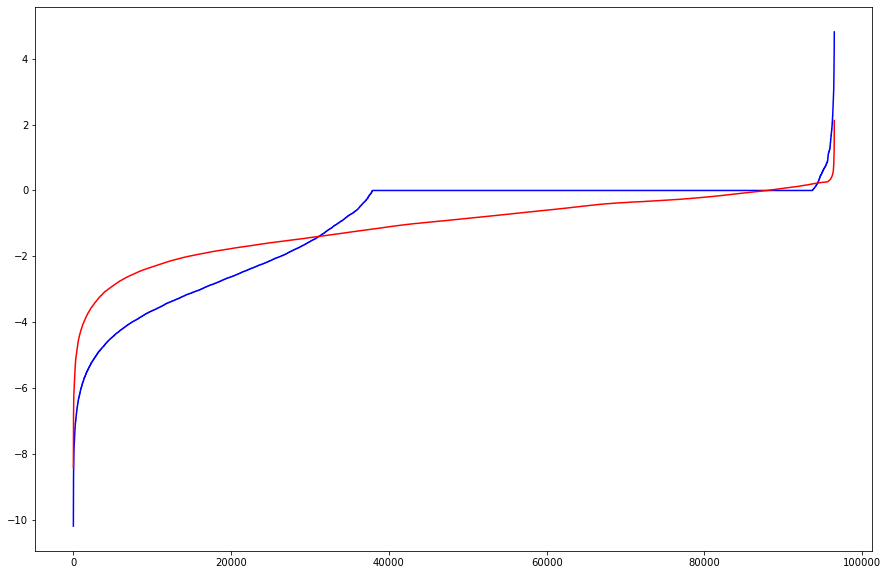

In [15]:
plt.figure(figsize=(15,10))
plt.plot(range(df.shape[0]),np.sort(Y),color="blue")
plt.plot(range(df.shape[0]),np.sort(lrm.predict(X)),color="red")
plt.show()

In [16]:
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.533
Model:                            OLS   Adj. R-squared (uncentered):              0.533
Method:                 Least Squares   F-statistic:                          3.677e+04
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:28:54   Log-Likelihood:                     -1.6670e+05
No. Observations:               96453   AIC:                                  3.334e+05
Df Residuals:                   96450   BIC:                                  3.334e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Humidity                         0.2820      0.011     26.590      0.000       0.261       0.303
Wind Speed (km/h)                0.0958      0.001     74.776      0.000       0.093       0.098
Humidity * Wind Speed (km/h)    -0.3038      0.002   -149.513      0.000      -0.308      -0.300
==============================================================================
Omnibus:                     4919.327   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9471.445
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       4.333   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-kare degerleri 0.533'dir. Nem ve Ruzgar Hizi etkilesimini dahil ettikten sonra R-kare degeri buyuk miktarda artis gosterdi.
Dolayisiyla bu modelimiz datasetimizi daha iyi acikliyor.

In [50]:
Y = df["Apparent Temperature (C)"] - df["Temperature (C)"]
df1 = df[["Humidity","Wind Speed (km/h)","Visibility (km)"]]
X = df1

In [51]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-2.60664109 -0.11990113  0.05398318]
Sabit değer (bias): 
 1.5755946860023298


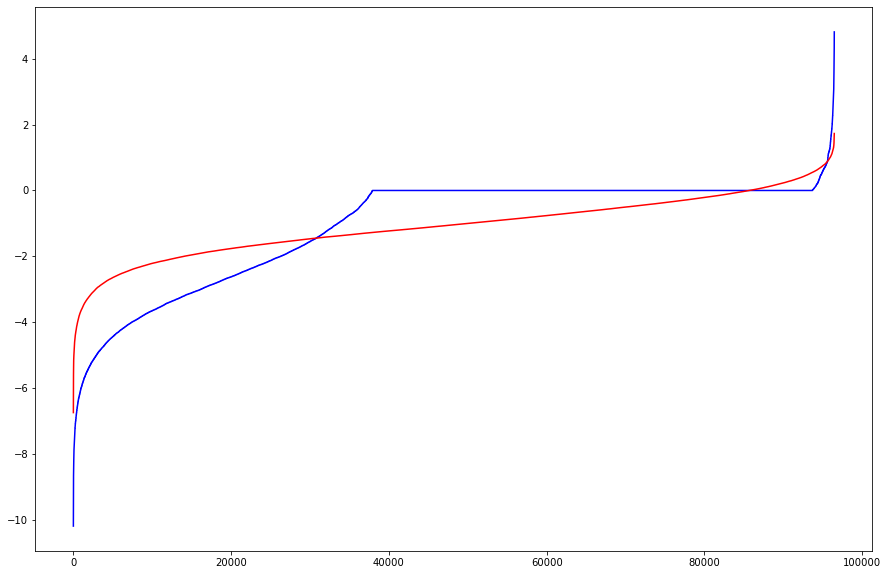

In [53]:
plt.figure(figsize=(15,10))
plt.plot(range(df.shape[0]),np.sort(Y),color="blue")
plt.plot(range(df.shape[0]),np.sort(lrm.predict(X)),color="red")
plt.show()

In [54]:
X = sm.add_constant(X)

In [55]:
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:36:18   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5756      0.028     56.605      0.000       1.521       1.630
Humidity             -2.6066      0.025   -102.784      0.000      -2.656      -2.557
Wind Speed (km/h)    -0.1199      0.001   -179.014      0.000      -0.121      -0.119
Visibility (km)       0.0540      0.001     46.614      0.000       0.052       0.056
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                          -0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-kare degerleri 0.304'dir. Nem ve Ruzgar Hizi etkilesimini dahil etmeden, ek degisken olarak gorunurluk ekledigimizde R-kare degeri kucuk miktarda artis gosterdi. Dolayisiyla bu modelimiz datasetimizi daha iyi acikliyor.

AIC ve BIC degerleri degismedi.

2.

In [39]:
train = pd.read_csv('./train.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [40]:
processed_nondiscrete = train[["LotArea",
"YearBuilt",
"Fireplaces",
"PoolArea",
"YrSold",
"GarageArea",
"OverallQual",
"OverallCond",
"GarageCars",
"TotRmsAbvGrd"]]

In [20]:
processed_categorical = pd.get_dummies(train[["MSSubClass",
"MSZoning",
"Street",
"LandContour",
"Utilities",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"Exterior1st",
"ExterQual",
"ExterCond",
"Foundation",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"KitchenQual",
"Functional",
"GarageType",
"GarageFinish",
"GarageQual",
"SaleCondition"
]])

In [24]:
df2=processed_categorical
df2.append(processed_nondiscrete)
df2.head()

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df2.isnull().sum()*100/df.shape[0]

MSSubClass               0.0
MSZoning_C (all)         0.0
MSZoning_FV              0.0
MSZoning_RH              0.0
MSZoning_RL              0.0
                        ... 
SaleCondition_AdjLand    0.0
SaleCondition_Alloca     0.0
SaleCondition_Family     0.0
SaleCondition_Normal     0.0
SaleCondition_Partial    0.0
Length: 148, dtype: float64

In [26]:
Y = train['SalePrice']
X = df2

In [27]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [   -229.56956671  -23726.27204547   -2734.29077547    6026.32669589
    6885.10311383   13549.1330114     1387.28124065   -1387.28124055
  -14256.91626341   11386.77774556    8896.71653528   -6026.57801753
   41809.21694969  -41809.21694971   19480.44962184   -8138.95135745
   -8312.77071341  -29337.45517768    6206.83439788  -10087.45913489
   15179.06390792  -36187.9394442   -27877.04931181  -49844.55994962
  -36822.86061834  -18254.19118485  -26540.04907823   12958.83113927
   -4543.26251884   99301.6716387    57762.24654304  -44242.19511097
  -22946.42808861  -26793.4311669    -4191.02880089   17657.17297037
   75563.61171743   19083.22808807   30926.52163253   -3008.1802143
   -8456.38247965     994.58785511   23957.72083147   23138.18614367
  -11865.73282365    1421.05293483  -30567.88364786    4386.63140041
   -2849.91922298    8084.17031424    4530.77659281   72565.688213
 -110619.96632748   15941.23615167   11100.42311016    1247.59116857
    2790.4193017    37

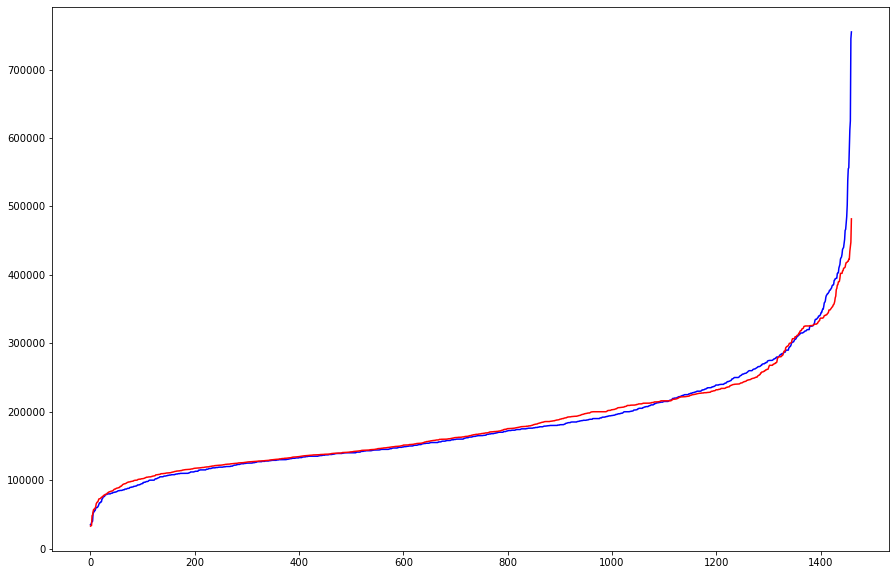

In [29]:
plt.figure(figsize=(15,10))
plt.plot(range(df2.shape[0]),np.sort(Y),color="blue")
plt.plot(range(df2.shape[0]),np.sort(lrm.predict(X)),color="red")
plt.show()

In [30]:
X = sm.add_constant(X)

In [31]:
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     36.04
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:05:20   Log-Likelihood:                -17456.
No. Observations:                1460   AIC:                         3.517e+04
Df Residuals:                    1332   BIC:                         3.585e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.617e+04   1.09e+04      1.489      0.137   -5134.494    3.75e+04
MSSubClass             -229.5696    136.004     -1.688      0.092    -496.375      37.236
MSZoning_C (all)      -2.049e+04   1.34e+04     -1.525      0.127   -4.69e+04    5869.056
MSZoning_FV             499.4909   9749.811      0.051      0.959   -1.86e+04    1.96e+04
MSZoning_RH            9260.1084   1.01e+04      0.919      0.358   -1.05e+04     2.9e+04
MSZoning_RL            1.012e+04   5480.407      1.846      0.065    -632.285    2.09e+04
MSZoning_RM            1.678e+04   6110.587      2.747      0.006    4795.491    2.88e+04
Street_Grvl            9471.7354   1.19e+04      0.798      0.425   -1.38e+04    3.28e+04
Street_Pave            6697.1729   1.01e+04      0.666      0.506    -1.3e+04    2.64e+04
LandContour_Bnk       -1.021e+04   5530.832     -1.847      0.065   -2.11e+04     635.401
LandContour_HLS        1.543e+04   5916.472      2.608      0.009    3822.385     2.7e+04
LandContour_Low        1.294e+04   6745.470      1.918      0.055    -293.959    2.62e+04
LandContour_Lvl       -1984.3509   3934.315     -0.504      0.614   -9702.480    5733.778
Utilities_AllPub       4.989e+04   2.03e+04      2.453      0.014    9992.557    8.98e+04
Utilities_NoSeWa      -3.372e+04   2.41e+04     -1.402      0.161   -8.09e+04    1.35e+04
Neighborhood_Blmngtn   2.013e+04   1.11e+04      1.813      0.070   -1654.092    4.19e+04
Neighborhood_Blueste  -7492.1950    2.8e+04     -0.268      0.789   -6.24e+04    4.74e+04
Neighborhood_BrDale   -7666.0144   1.25e+04     -0.615      0.539   -3.21e+04    1.68e+04
Neighborhood_BrkSide  -2.869e+04   7384.731     -3.885      0.000   -4.32e+04   -1.42e+04
Neighborhood_ClearCr   6853.5907   8538.751      0.803      0.422   -9897.274    2.36e+04
Neighborhood_CollgCr  -9440.7028   4579.944     -2.061      0.039   -1.84e+04    -456.014
Neighborhood_Crawfor   1.583e+04   6455.544      2.452      0.014    3161.679    2.85e+04
Neighborhood_Edwards  -3.554e+04   5001.171     -7.107      0.000   -4.54e+04   -2.57e+04
Neighborhood_Gilbert  -2.723e+04   5789.676     -4.703      0.000   -3.86e+04   -1.59e+04
Neighborhood_IDOTRR    -4.92e+04   1.02e+04     -4.837      0.000   -6.92e+04   -2.92e+04
Neighborhood_MeadowV  -3.618e+04    1.3e+04     -2.791      0.005   -6.16e+04   -1.07e+04
Neighborhood_Mitchel  -1.761e+04   6260.958     -2.812      0.005   -2.99e+04   -5325.022
Neighborhood_NAmes    -2.589e+04   4126.162     -6.275      0.000    -3.4e+04   -1.78e+04
Neighborhood_NPkVill   1.361e+04   1.44e+04      0.943      0.346   -1.47e+04    4.19e+04
Neighborhood_NWAmes   -3896.5062   5680.950     -0.686      0.493    -1.5e+04    7248.078
Neighborhood_NoRidge   9.995e+04   7239.452     13.806      0.000    8.57e+04    1.14e+05
Neighborhood_NridgHt   

R-kare degeri 0.775, oldukca yuksek ve modedlin dataseti acikladigini gosterir. Ayarlanmis R-kare degeri de buna oldukca yakindir. F istatistigi dusuktur. Ic ice olan bir model soz konusu olmadigi icin bunu degerlendirecek bir durum yoktur. AIC degeri 35170, BIC degeri 35850, daha dusuk olmasi daha iyi olurdu ancak sorun olan bir durum yoktur.

R-kare degeri kismen yuksek oldugu icin ve overfit de olmadigi icin kismen tatmin edicidir, ancak daha da yukseltilebilir gibi durmakta.

In [78]:
processed_nondiscrete = train[["LotArea",
"YearBuilt",
"Fireplaces",
"PoolArea",
"YrSold",
"GarageArea",
"OverallQual",
"OverallCond",
"GarageCars",
"TotRmsAbvGrd"]]

In [79]:
processed_categorical = pd.get_dummies(train[["MSSubClass",
"MSZoning",
"Street",
"LandContour",
"Utilities",
"Neighborhood",
"Condition1",
"BldgType",
"HouseStyle",
"Exterior1st",
"ExterQual",
"ExterCond",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"KitchenQual",
"Functional",
"GarageType",
"GarageFinish",
"GarageQual"
]])

In [86]:
train["LotArea*OverallQual"]=train["LotArea"]*train["OverallQual"]

In [92]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotArea * OverallQual,LotArea*OverallQual
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,59150,59150
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,57600,57600
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,78750,78750
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,66850,66850
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,114080,114080


In [87]:
train["LotArea*OverallQual"]

0        59150
1        57600
2        78750
3        66850
4       114080
         ...  
1455     47502
1456     79050
1457     63294
1458     48585
1459     49685
Name: LotArea*OverallQual, Length: 1460, dtype: int64

In [90]:
processed_nondiscrete = train[["LotArea*OverallQual",
"LotArea",
"YearBuilt",
"Fireplaces",
"PoolArea",
"YrSold",
"GarageArea",
"OverallQual",
"OverallCond",
"GarageCars",
"TotRmsAbvGrd"]]

In [93]:
processed_nondiscrete.head()

,LotArea*OverallQual,LotArea,YearBuilt,Fireplaces,PoolArea,YrSold,GarageArea,OverallQual,OverallCond,GarageCars,TotRmsAbvGrd
0,59150,8450,2003,0,0,2008,548,7,5,2,8
1,57600,9600,1976,1,0,2007,460,6,8,2,6
2,78750,11250,2001,1,0,2008,608,7,5,2,6
3,66850,9550,1915,1,0,2006,642,7,5,3,7
4,114080,14260,2000,1,0,2008,836,8,5,3,9


"SaleCondition" ve "Foundation" degiskenlerini kaldirdik.

In [108]:
df2=processed_nondiscrete
df2.append(processed_categorical)
df2["OverallQual2"] =df2["OverallQual"]**2
df2.head()

,LotArea*OverallQual,LotArea,YearBuilt,Fireplaces,PoolArea,YrSold,GarageArea,OverallQual,OverallCond,GarageCars,TotRmsAbvGrd,OverallQual2
0,59150,8450,2003,0,0,2008,548,7,5,2,8,49
1,57600,9600,1976,1,0,2007,460,6,8,2,6,36
2,78750,11250,2001,1,0,2008,608,7,5,2,6,49
3,66850,9550,1915,1,0,2006,642,7,5,3,7,49
4,114080,14260,2000,1,0,2008,836,8,5,3,9,64


In [109]:
Y = train['SalePrice']
X = df2

In [110]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-8.24583986e-02  1.36868232e+00  5.25557382e+02  1.49354096e+04
  1.59034522e+01 -3.82973956e+02  3.06148449e+01 -5.76044671e+04
  9.10315034e+03  7.85610209e+03  9.64538195e+03  6.76609490e+03]
Sabit değer (bias): 
 -159613.4251697125


In [112]:
X = sm.add_constant(X)

In [113]:
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     469.4
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:59:03   Log-Likelihood:                -17385.
No. Observations:                1460   AIC:                         3.480e+04
Df Residuals:                    1447   BIC:                         3.486e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.596e+05   1.43e+06     -0.111      0.911   -2.97e+06    2.65e+06
LotArea*OverallQual    -0.0825      0.084     -0.981      0.327      -0.247       0.082
LotArea                 1.3687      0.543      2.519      0.012       0.303       2.435
YearBuilt             525.5574     45.292     11.604      0.000     436.713     614.401
Fireplaces           1.494e+04   1682.136      8.879      0.000    1.16e+04    1.82e+04
PoolArea               15.9035     24.055      0.661      0.509     -31.283      63.090
YrSold               -382.9740    713.973     -0.536      0.592   -1783.508    1017.560
GarageArea             30.6148      9.627      3.180      0.002      11.731      49.499
OverallQual          -5.76e+04   4645.085    -12.401      0.000   -6.67e+04   -4.85e+04
OverallCond          9103.1503    963.344      9.450      0.000    7213.451     1.1e+04
GarageCars           7856.1021   2910.087      2.700      0.007    2147.661    1.36e+04
TotRmsAbvGrd         9645.3819    687.922     14.021      0.000    8295.951     1.1e+04
OverallQual2         6766.0949    374.800     18.053      0.000    6030.886    7501.304
==============================================================================
Omnibus:                      399.780   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22152.143
Skew:                           0.389   Prob(JB):                         0.00
Kurtosis:                      22.067   Cond. No.                     1.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""